In this course, we will cover important concepts and techniques related to handling missing data, outliers, categorical variables, feature creation and feature scaling and normalization. These topics are fundamental for preparing data before conducting thorough analysis. We will explore practical approaches and strategies that will enable you to effectively preprocess data and lay a strong foundation for your data analysis journey.


# 1. Handling missing data

Missing data (or missing values) is defined as the data value that is not stored for a variable in the observation of interest. The problem of
missing data is relatively common in almost all research and can have a significant effect on the conclusions that can be drawn from the data:
missing data can reduce the statistical power of a study and can produce biased estimates, leading to invalid conclusions

In [ ]:
import pandas as pd
import numpy as np

# Creating a sample dataframe with missing values
data = {'A': [1, 2, None, 4, 5],
        'B': [None, 2, 3, 4, 5],
        'C': [1, 2, 3, None, 5]}
df = pd.DataFrame(data)
print(df)

     A    B    C
0  1.0  NaN  1.0
1  2.0  2.0  2.0
2  NaN  3.0  3.0
3  4.0  4.0  NaN
4  5.0  5.0  5.0


## 1.2 Missing values treatment

When dealing with missing values, it is important to have effective strategies in place.Now we will show techniques such as imputation and exclusion to handle missing data, enabling you to make informed decisions and maintain the integrity of your analyses.

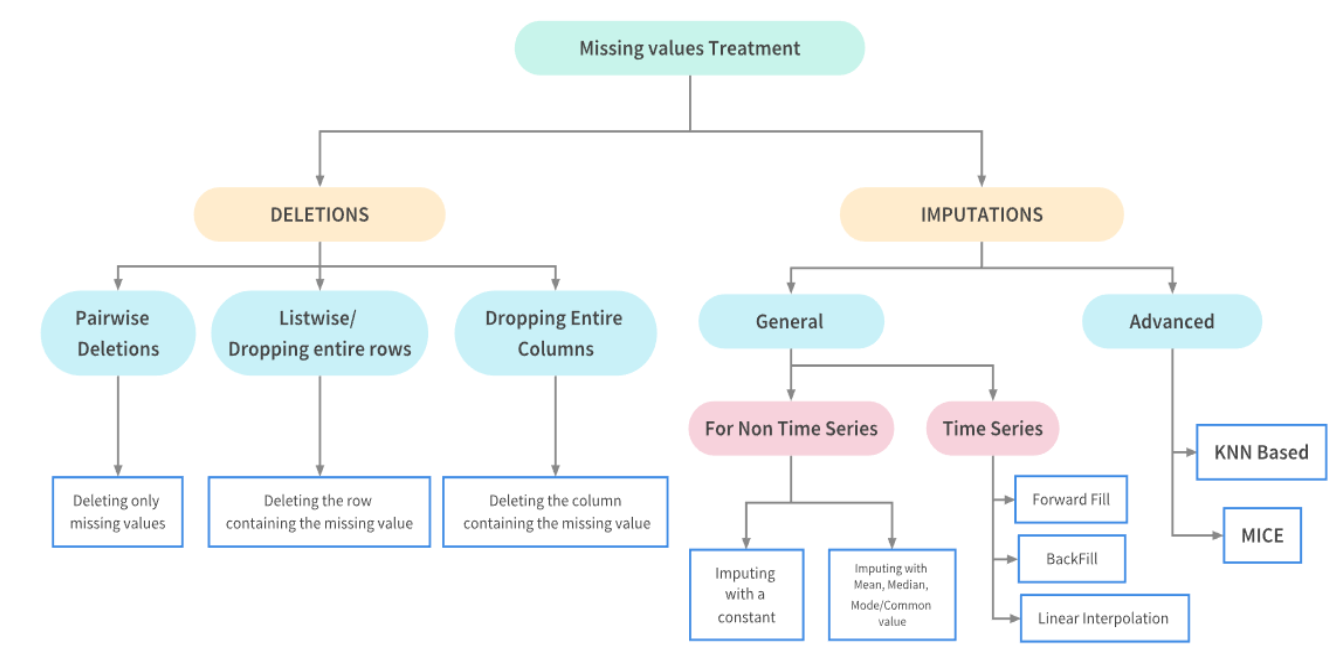

In [ ]:
from PIL import Image
Image.open('/content/drive/MyDrive/Class 23-24/3. Images/2. Data processing/1_missing_full_esquema.PNG')

### 1.2.1 Deletions

Deletions in missing values treatment refer to the process of removing or excluding rows or columns from a dataset that contain missing values. <br>
Types of deletions:

**Listwise deletions** <br>
Used when values are missing completely at random i.e MCAR. During Listwise deletion, only the missing values are deleted. All operations in pandas like mean, sum, etc intrinsically skip missing values.

In [1]:
import pandas as pd


# Creating a sample dataframe with missing values
data = {'A': [1, 2, None, 4, 5],
        'B': [None, 2, 3, 4, 5],
        'C': [1, 2, 3, None, 5]}
df = pd.DataFrame(data)

# Applying listwise deletion
df_listwise_deleted = df.dropna()

# Displaying the original and listwise deleted dataframes
print("Original DataFrame:")
display(df)
print("\nListwise Deleted DataFrame:")
display(df_listwise_deleted)

Original DataFrame:


,A,B,C
0,1.0,NaN,1.0
1,2.0,2.0,2.0
2,NaN,3.0,3.0
3,4.0,4.0,NaN
4,5.0,5.0,5.0



Listwise Deleted DataFrame:


,A,B,C
1,2.0,2.0,2.0
4,5.0,5.0,5.0


**Dropping complete columns:**  <br>
If a column contains a lot of missing values, say more than 80%, and the feature is not significant, you might want to delete that feature. However, again, it is not a good methodology to delete data.

In [ ]:
import pandas as pd

# Create a sample DataFrame
data = {
    'A': [1, 2, 3, 4, None],
    'B': [5, None, 7, 8, 9],
    'C': [None, 1, None, None, None],
    'D': [10, 11, 12, 13, 14]
}

df = pd.DataFrame(data)

# Calculate the percentage of missing values in each column
missing_percentages = df.isnull().sum() / len(df) * 100

# Define the threshold for dropping columns (80% or more missing values)
threshold = 80

# Get the column names that exceed the threshold
columns_to_drop = missing_percentages[missing_percentages >= threshold].index

# Drop the columns from the DataFrame
df_dropped = df.drop(columns_to_drop, axis=1)

# Print the original DataFrame
print("Original DataFrame:")
display(df)

# Print the DataFrame after dropping columns
print("\nDataFrame after dropping columns:")
display(df_dropped)

Original DataFrame:


,A,B,C,D
0,1.0,5.0,NaN,10
1,2.0,NaN,1.0,11
2,3.0,7.0,NaN,12
3,4.0,8.0,NaN,13
4,NaN,9.0,NaN,14



DataFrame after dropping columns:


,A,B,D
0,1.0,5.0,10
1,2.0,NaN,11
2,3.0,7.0,12
3,4.0,8.0,13
4,NaN,9.0,14


### 1.2.2 Imputations

Imputation refers to replacing missing data with substituted values. There are a lot ofways in which the missing values can be imputed depending upon the nature of the problem and data.

In [ ]:
os.listdir(image_folder)

['1_missing_full_esquema.PNG',
 '2_missing_imputation.PNG',
 '4_outliers_iqr.PNG',
 '7_normalization_standarization.png',
 '5_outliers_sd.PNG',
 '3_outliers_!.PNG',
 '6_normalization.PNG']

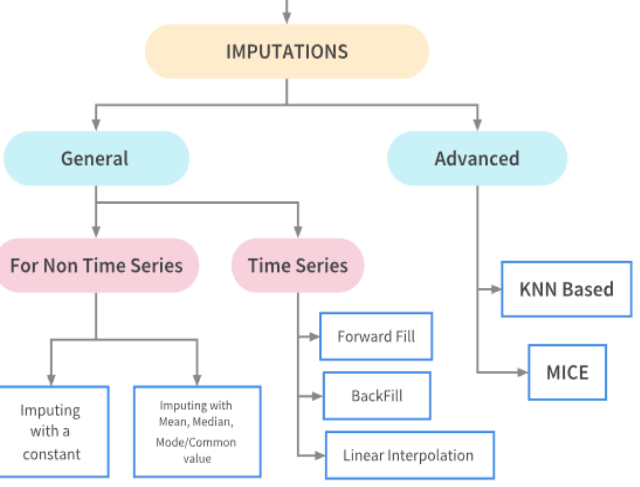

In [ ]:
Image.open('/content/drive/MyDrive/Class 23-24/3. Images/2. Data processing/2_missing_imputation.PNG')

**Imputing a constant**: <br>
Imputes a constant value to all NaN

In [ ]:
import pandas as pd
import numpy as np

# Create a sample DataFrame
data = {
    'A': [1, 2, np.nan, 4, 5],
    'B': [6, np.nan, 8, 9, 10],
    'C': [11, 12, 13, np.nan, 15]
}

df = pd.DataFrame(data)
CONSTANT = 2

# Impute missing values with a constant (e.g., 0)
imputed_df = df.fillna(CONSTANT)

# Print the original DataFrame
print("Original DataFrame:")
display(df)

# Print the DataFrame after imputation
print("\nDataFrame after imputation:")
display(imputed_df)

Original DataFrame:


,A,B,C
0,1.0,6.0,11.0
1,2.0,NaN,12.0
2,NaN,8.0,13.0
3,4.0,9.0,NaN
4,5.0,10.0,15.0



DataFrame after imputation:


,A,B,C
0,1.0,6.0,11.0
1,2.0,2.0,12.0
2,2.0,8.0,13.0
3,4.0,9.0,2.0
4,5.0,10.0,15.0


**Imputing the mean**: <br>
Imputes the mean value of the column with NaN

In [ ]:
import pandas as pd
import numpy as np

# Create a sample DataFrame
data = {
    'A': [1, 2, np.nan, 4, 5],
    'B': [6, np.nan, 8, 9, 10],
    'C': [11, 12, 13, np.nan, 15]
}

df = pd.DataFrame(data)

# Impute missing values with the mean of the column
imputed_df = df.fillna(df.mean())

# Print the original DataFrame
print("Original DataFrame:")
display(df)

# Print the DataFrame after imputation
print("\nDataFrame after imputation:")
display(imputed_df)

Original DataFrame:


,A,B,C
0,1.0,6.0,11.0
1,2.0,NaN,12.0
2,NaN,8.0,13.0
3,4.0,9.0,NaN
4,5.0,10.0,15.0



DataFrame after imputation:


,A,B,C
0,1.0,6.00,11.00
1,2.0,8.25,12.00
2,3.0,8.00,13.00
3,4.0,9.00,12.75
4,5.0,10.00,15.00


**Forward fill:**<br>
Replace NaN s with last observed value

In [ ]:
import pandas as pd
import numpy as np

# Create a sample DataFrame
data = {
    'A': [1, 2, np.nan, 4, 5],
    'B': [6, np.nan, 8, 9, 10],
    'C': [11, 12, 13, np.nan, 15]
}

df = pd.DataFrame(data)

# Impute missing values using forward fill
imputed_df = df.fillna(method='ffill')

# Print the original DataFrame
print("Original DataFrame:")
display(df)

# Print the DataFrame after imputation
print("\nDataFrame after imputation:")
display(imputed_df)

Original DataFrame:


,A,B,C
0,1.0,6.0,11.0
1,2.0,NaN,12.0
2,NaN,8.0,13.0
3,4.0,9.0,NaN
4,5.0,10.0,15.0



DataFrame after imputation:


,A,B,C
0,1.0,6.0,11.0
1,2.0,6.0,12.0
2,2.0,8.0,13.0
3,4.0,9.0,13.0
4,5.0,10.0,15.0


**Backfill:** <br>
Replace NaN s with next observed value

In [ ]:
import pandas as pd
import numpy as np

# Create a sample DataFrame
data = {
    'A': [1, 2, np.nan, 4, 5],
    'B': [6, np.nan, 8, 9, 10],
    'C': [11, 12, 13, np.nan, 15]
}

df = pd.DataFrame(data)

# Impute missing values using backfill
imputed_df = df.fillna(method='bfill')

# Print the original DataFrame
print("Original DataFrame:")
display(df)

# Print the DataFrame after imputation
print("\nDataFrame after imputation:")
display(imputed_df)

Original DataFrame:


,A,B,C
0,1.0,6.0,11.0
1,2.0,NaN,12.0
2,NaN,8.0,13.0
3,4.0,9.0,NaN
4,5.0,10.0,15.0



DataFrame after imputation:


,A,B,C
0,1.0,6.0,11.0
1,2.0,8.0,12.0
2,4.0,8.0,13.0
3,4.0,9.0,15.0
4,5.0,10.0,15.0


**Linear interpolation:** <br>
Assumes a linear relationship between data points and utilizes non-missing values from adjacent data points to compute a value for a missing data point.

In [ ]:
import pandas as pd
import numpy as np

# Create a sample DataFrame
data = {
    'A': [1, 2, np.nan, 4, 5],
    'B': [6, np.nan, 8, 9, 10],
    'C': [11, 12, 13, np.nan, 15]
}

df = pd.DataFrame(data)

# Impute missing values using linear interpolation
imputed_df = df.interpolate()

# Print the original DataFrame
print("Original DataFrame:")
display(df)

# Print the DataFrame after imputation
print("\nDataFrame after imputation:")
display(imputed_df)

Original DataFrame:


,A,B,C
0,1.0,6.0,11.0
1,2.0,NaN,12.0
2,NaN,8.0,13.0
3,4.0,9.0,NaN
4,5.0,10.0,15.0



DataFrame after imputation:


,A,B,C
0,1.0,6.0,11.0
1,2.0,7.0,12.0
2,3.0,8.0,13.0
3,4.0,9.0,14.0
4,5.0,10.0,15.0


## 1.3 Exercises

For each dataset:
* Find the missing values
* Select the best approach to imput them

In [ ]:
# Dataframe 1

import pandas as pd
import numpy as np

# Create a time series dataset with missing data
dates = pd.date_range(start='2023-01-01', periods=10, freq='D')
data = {'Value': [10, 15, np.nan, 20, 30, np.nan, 35, 40,  np.nan, 50]}
df = pd.DataFrame(data, index=dates)

# Print the original DataFrame
print("Original DataFrame:")
display(df)

Original DataFrame:


,Value
2023-01-01,10.0
2023-01-02,15.0
2023-01-03,NaN
2023-01-04,20.0
2023-01-05,30.0
2023-01-06,NaN
2023-01-07,35.0
2023-01-08,40.0
2023-01-09,NaN
2023-01-10,50.0


In [ ]:
# Dataframe 2
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer

# Create a dataset with missing data
data = {
    'age': [25, 30, 65, 75, 25, np.nan, 20, 40, 60, 65],
    'height': [160, 165, np.nan, np.nan, 170, 175, 180, 185, np.nan, np.nan],
    'weight': [60, 65, 60, np.nan, 75, np.nan, np.nan, 80, 85, 90]
}

df = pd.DataFrame(data)

# Print the original DataFrame
print("Original DataFrame:")
display(df)


Original DataFrame:


,age,height,weight
0,25.0,160.0,60.0
1,30.0,165.0,65.0
2,65.0,NaN,60.0
3,75.0,NaN,NaN
4,25.0,170.0,75.0
5,NaN,175.0,NaN
6,20.0,180.0,NaN
7,40.0,185.0,80.0
8,60.0,NaN,85.0
9,65.0,NaN,90.0


In [ ]:
# Dataframe 3
import pandas as pd
import numpy as np

# Create a dataset with 5 columns
data = {
    'A': [1, 2, np.nan, 4, 5],
    'B': [np.nan, 2, 3, np.nan, 5],
    'C': [1, np.nan, 3, 4, np.nan],
    'D': [np.nan, np.nan, np.nan, np.nan, np.nan],
    'E': [np.nan, np.nan, 3, np.nan, np.nan]
}

df = pd.DataFrame(data)


print("Original DataFrame:")
display(df)

Original DataFrame:


,A,B,C,D,E
0,1.0,NaN,1.0,NaN,NaN
1,2.0,2.0,NaN,NaN,NaN
2,NaN,3.0,3.0,NaN,3.0
3,4.0,NaN,4.0,NaN,NaN
4,5.0,5.0,NaN,NaN,NaN


**Solutions**:

In [ ]:
# Dataset1: Imputed with ffil (any kind of timesries imputation would work)


Original DataFrame:


,Value
2023-01-01,10.0
2023-01-02,15.0
2023-01-03,NaN
2023-01-04,20.0
2023-01-05,30.0
2023-01-06,NaN
2023-01-07,35.0
2023-01-08,40.0
2023-01-09,NaN
2023-01-10,50.0



DataFrame after imputation:


,Value
2023-01-01,10.0
2023-01-02,15.0
2023-01-03,15.0
2023-01-04,20.0
2023-01-05,30.0
2023-01-06,30.0
2023-01-07,35.0
2023-01-08,40.0
2023-01-09,40.0
2023-01-10,50.0


In [ ]:
# Dataframe 2


In [ ]:
# Dataframe3: Since some columns have a lot of nas, we remove them



Original DataFrame:


,A,B,C,D,E
0,1.0,NaN,1.0,NaN,NaN
1,2.0,2.0,NaN,NaN,NaN
2,NaN,3.0,3.0,NaN,3.0
3,4.0,NaN,4.0,NaN,NaN
4,5.0,5.0,NaN,NaN,NaN


Missing Percentage:


A     20.0
B     40.0
C     40.0
D    100.0
E     80.0
dtype: float64


Filtered Dataset:


,A,B,C
0,1.0,NaN,1.0
1,2.0,2.0,NaN
2,NaN,3.0,3.0
3,4.0,NaN,4.0
4,5.0,5.0,NaN


# 2. Handling outliers

Outliers are data points which lie at an abnormal distance from other points in a random sample from a population. In statistics, an outlier is a data point that differs significantly from other observations. They may be due to variability in the measurement or may indicate experimental errors. <br>

Outliers can skew trends and forecasts modelled from datasets, negatively impacting the quality and accuracy of decisions. Actively monitoring and performing outlier detection can flag errors in datasets and combat concept drift in machine learning models. If outliers are not identified and removed, models can become less accurate

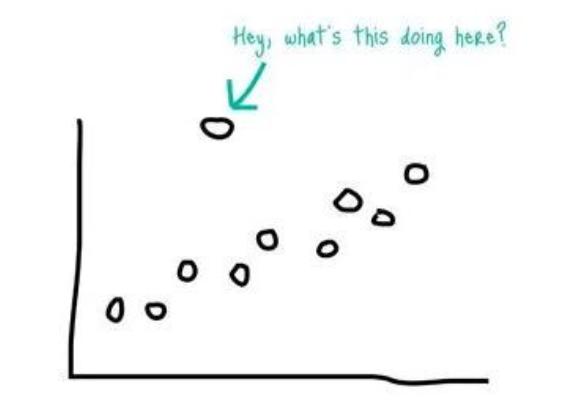

In [ ]:
Image.open('/content/drive/MyDrive/Class 23-24/3. Images/2. Data processing/3_outliers_!.PNG')

## 2.1 Types of outliers

**Point outlier:** <br>
Individual data point that sits outside of the range of the rest of the dataset. There may be a clear pattern, trend or grouping within the dataset, and an outlier as a data point will be significantly different to this. Point outliers can often be attributed to an error with the measurement or input of the data.

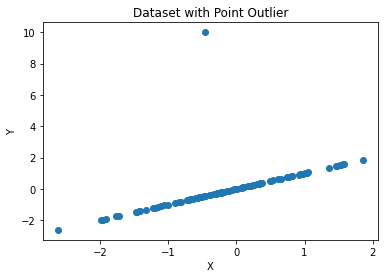

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate random data
np.random.seed(42)
x = np.random.normal(0, 1, 100)  # Randomly generated 100 data points

# Add an outlier
outlier_index = np.random.randint(0, 100)  # Randomly choose an index
y = np.copy(x)
y[outlier_index] = 10  # Set the value of the chosen index as an outlier

# Plot the data
plt.scatter(x, y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Dataset with Point Outlier')
plt.show()


**Contextual outliers:** <br>
Data point is significantly different from the dataset, but only within a specific context. The context of a dataset may change seasonally or fluctuate with wider economic trends or behavior. A contextual outlier will be noticeable when the context of the dataset changes. This could be seasonal weather changes, economic fluctuations, changes in customer behavior for key holidays, or even the time of the day. For this reason, a contextual outlier may seem like a normal data point in other contexts.

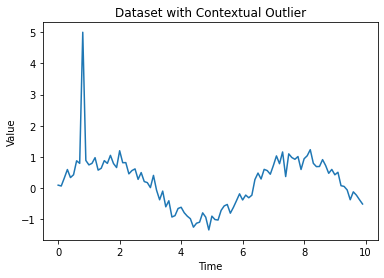

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate time series data
np.random.seed(42)

# Define the time range
t = np.arange(0, 10, 0.1)

# Generate the time series values
data = np.sin(t) + np.random.normal(0, 0.2, len(t))

# Add an outlier
outlier_index = np.random.randint(0, len(t))
data[outlier_index] = 5  # Set the value of the outlier point

# Plot the time series data
plt.plot(t, data)
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Dataset with Contextual Outlier')
plt.show()

**Collective outliers:** <br>
It's when a series of data points differ significantly from the trends in the rest of the dataset. The individual data points within a collective outlier may not seem like a point outlier or a contextual outlier. It’s when the data points are considered as a collection that anomalous patterns are observed. For this reason, collective outliers can be the hardest type of outlier to identify.

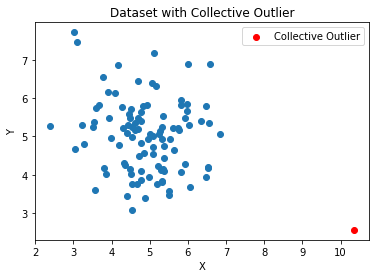

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate random data for a dense cluster
np.random.seed(42)

# Cluster
x = np.random.normal(5, 1, 100)
y = np.random.normal(5, 1, 100)

# Add a collective outlier
outlier_x = np.random.normal(10, 1)
outlier_y = np.random.normal(2, 1)

# Plot the data
plt.scatter(x, y)
plt.scatter(outlier_x, outlier_y, color='red', label='Collective Outlier')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Dataset with Collective Outlier')
plt.legend()
plt.show()

## 2.2 Outlier Detection Techniques

### 2.2.1 Interquartile Range Method

The concept of the Interquartile Range (IQR) is used to build the boxplot graphs. IQR is a concept in statistics that is used to measure the statistical dispersion and data variability by dividing the dataset into quartiles. It is the difference between the third quartile and the first quartile (IQR = Q3 -Q1). Outliers in this case are defined as the observations that are below (Q1 − 1.5x IQR) or boxplot lower whisker or above (Q3 + 1.5x IQR) or boxplot upper whisker. It can be visually represented by the box plot.

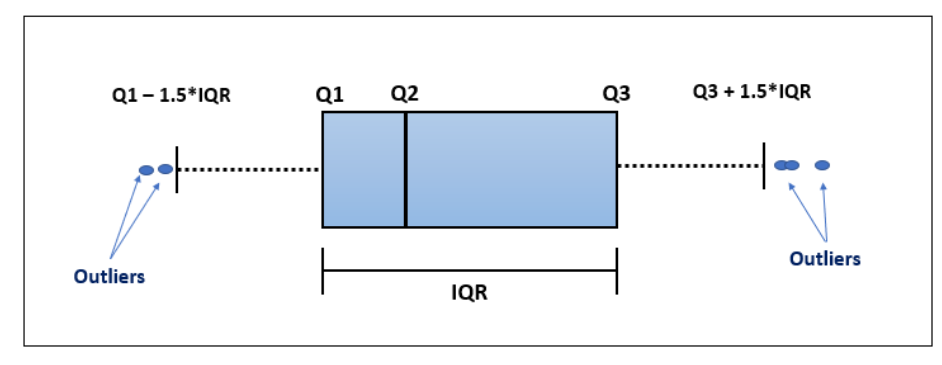

In [ ]:
Image.open('/content/drive/MyDrive/Class 23-24/3. Images/2. Data processing/4_outliers_iqr.PNG')

**Example**:

List of data:
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, -25, -100, 200]


Text(0.5, 1.0, 'Representation of the data')

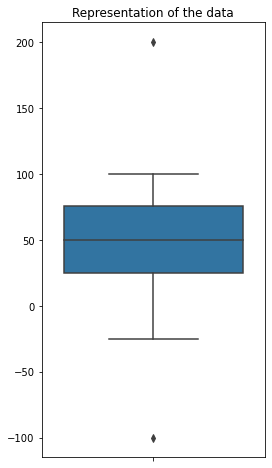

In [ ]:
import seaborn as sns

# Define data
data = list(range(1, 100+1))
data.extend([-25, -100, 200])
print('List of data:')
print(data)

# Plot boxplot
plt.figure(figsize = (4,8))
sns.boxplot(y = data)
plt.title('Representation of the data')

In [ ]:
# Detect outliers:

# Calculate quartiles 25% and 75%
q25, q75 = np.quantile(data, 0.25), np.quantile(data, 0.75)

# calculate the IQR
iqr = q75 - q25

# calculate the outlier cutoff
cut_off = iqr * 1.5

# calculate the lower and upper bound value
lower, upper = q25 - cut_off, q75 + cut_off

# Calculate the number of records below and above lower and above bound value respectively
outliers = [x for x in data if (x >= upper) | (x <= lower)]

# Print basic information (can be removed)
print('The IQR is',iqr)
print('The lower bound value is', lower)
print('The upper bound value is', upper)
print('The list of outliers are', outliers)

The IQR is 51.0
The lower bound value is -52.0
The upper bound value is 152.0
The list of outliers are [-100, 200]


### 2.2.2 Standard Deviation Method

Standard deviation is a metric of variance i.e. how much the individual data points are spread out from the mean. In statistics, If a data distribution is approximately normal then about 68% of the data values lie within one standard deviation of the mean and about 95% are within two standard deviations, and about 99.7% lie within three standard deviations.

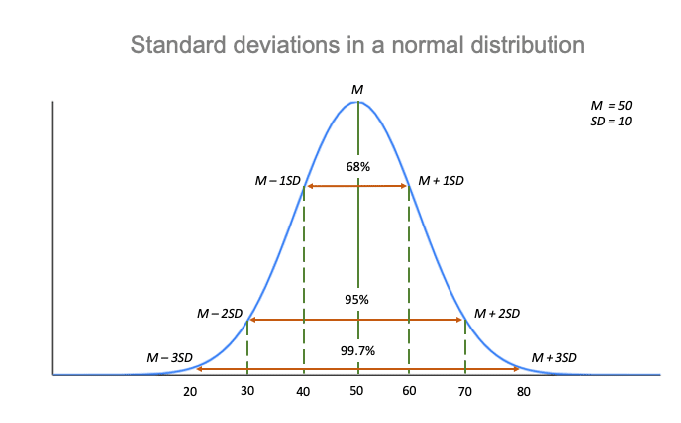

In [ ]:
Image.open('/content/drive/MyDrive/Class 23-24/3. Images/2. Data processing/5_outliers_sd.PNG')

In [ ]:
import numpy as np

# Define data
data = list(range(1, 100+1))
data.extend([-25, -100, 200])
print('List of data:')
print(data)

threshold=3.0
mean = np.mean(data)
std = np.std(data)
cutoff = threshold * std
lower_bound = mean - cutoff
upper_bound = mean + cutoff

# Calculate the number of records below and above lower and above bound value respectively
outliers = [x for x in data if (x >= upper_bound) | (x <= lower_bound)]


# Print basic information (can be removed)
print('The mean is',mean)
print('The std is',std)
print('The lower bound value is', lower_bound)
print('The upper bound value is', upper_bound)
print('The list of outliers are', outliers)


List of data:
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, -25, -100, 200]
The mean is 49.75728155339806
The std is 36.06479229242122
The lower bound value is -58.43709532386559
The upper bound value is 157.95165843066172
The list of outliers are [-100, 200]


## 2.3 Outlier treatment approaches

There exist three different options on how to treat non-error outliers:

* **Keep:** When most of the detected outliers are non-error outliers and rightfully belong to the population of interest, this is a good strategy. Also, you often cannot easily identify whether or not an extreme value is a part of the population of interest or not.
* **Delete:** The most straightforward option is to delete any outlying observation. However, this strategy bears a high risk of losing information. Especially if you find many outlying data points, try to avoid this.
* **Recode:** Recoding outliers is a good option to treat outliers and keep as much information as possible simultaneously. This option should always be accompanied by sound reasoning and explanation.
    * Winsorizing
    * Imputation

### 2.3.2 Imputation

 Imputation techniques involve replacing outliers with estimated values based on other data points. This can be done using various imputation methods such as mean imputation, median imputation, or regression imputation.

In [ ]:
import pandas as pd

def detect_outliers_iqr(data, column_name, threshold=1.5):
    Q1 = data[column_name].quantile(0.25)
    Q3 = data[column_name].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR

    outliers = data[(data[column_name] < lower_bound) | (data[column_name] > upper_bound)]

    return outliers

def impute_outliers_with_mean(data, column_name, outliers):
    # Calculate the mean excluding outliers
    filtered_data = data[~data.index.isin(outliers.index)]
    mean_without_outliers = filtered_data[column_name].mean()

    # Impute the mean to the outliers
    data.loc[outliers.index, column_name] = mean_without_outliers

    return data

# Define data as a pandas DataFrame
data = pd.DataFrame({'A': list(range(1, 100+1)) + [-25, -100, 200]})

print('Original data:\n')
display(data)

# Detect outliers in column 'A'
outliers = detect_outliers_iqr(data, 'A')

# Impute outliers with the mean of column 'A' (excluding outliers)
data = impute_outliers_with_mean(data, 'A', outliers)

print('Imputed data:\n')
display(data)


Original data:



,A
0,1
1,2
2,3
3,4
4,5
...,...
98,99
99,100
100,-25
101,-100


Imputed data:
               A
0      1.000000
1      2.000000
2      3.000000
3      4.000000
4      5.000000
..          ...
98    99.000000
99   100.000000
100  -25.000000
101   49.752475
102   49.752475

[103 rows x 1 columns]


## Exercise

Given the following dataset, imputate outliers  

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

# Generate some random data with outliers
np.random.seed(42)
data = np.random.normal(loc=10, scale=5, size=100)
data[10] = 50  # Add an outlier

**Solution**

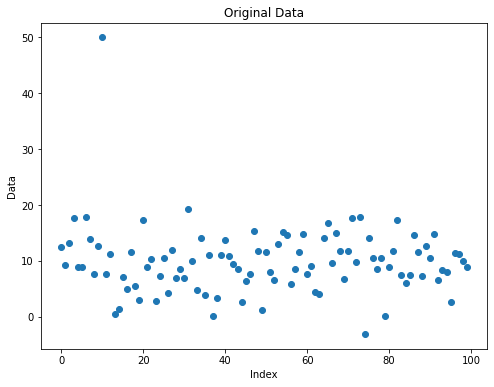

Founded outliers: [50.0]


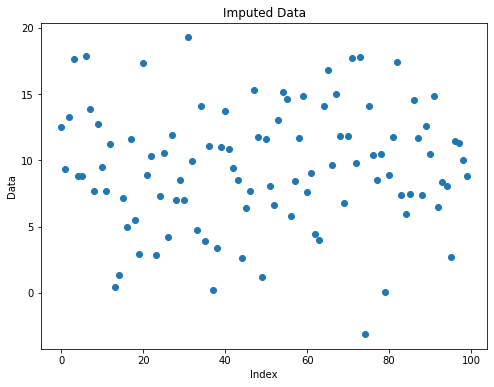

# 3. Dealing with categorical variables

Dealing with categorical variables is important specially for the **model compatibility**: most machine learning algorithms require numerical inputs. By encoding categorical variables into numerical representations, you enable the use of these variables in various machine learning models. To utilize these variables, they need to be transformed into a numerical representation, a process called "encoding." <br>

Categorical variables are typically divided into two types:

* **Nominal variables:** represent categories without any intrinsic order or hierarchy. For example, colors (red, blue, green) or countries (USA, UK, Germany) are nominal variables. In machine learning, nominal variables cannot be directly used in mathematical models because they lack numerical properties.  

* **Ordinal variables:** Ordinal variables represent categories with a clear order or ranking. For example, educational degrees (high school, bachelor's, master's, PhD) or survey ratings (strongly disagree, disagree, neutral, agree, strongly agree) are ordinal variables. Unlike nominal variables, ordinal variables can be encoded in a way that captures the inherent order.

Dealing methods:

## 3.1 Types of encoders:

### 3.1.1 One-Hot Encoding:

Transforms each category of a **nominal variable** into a binary vector where each element represents the presence or absence of the category.


In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Create a dataframe with a categorical variable
df = pd.DataFrame({'id': [1,2,3,4],
                   'color': ['red', 'blue', 'green', 'red']})

# Apply one-hot encoding
encoder = OneHotEncoder()
encoded_data = encoder.fit_transform(df[['color']]).toarray()

# Convert the encoded data back to a dataframe
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out (['color']))


# Concatenate the encoded dataframe with the 'id' column
encoded_df = pd.concat([df['id'], encoded_df], axis=1)

print('Original data:')
display(df)
print('\nEncoded data:')
display(encoded_df)

Original data:


,id,color
0,1,red
1,2,blue
2,3,green
3,4,red



Encoded data:


,id,color_blue,color_green,color_red
0,1,0.0,0.0,1.0
1,2,1.0,0.0,0.0
2,3,0.0,1.0,0.0
3,4,0.0,0.0,1.0


### 3.1.2 Label Encoding

Label encoding is a method that assigns a unique integer (numeric value) to each category in a categorical variable. This transformation is arbitrary and does not imply any order or rank among the categories.

In [5]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Create a dataframe with an ordinal variable
data = {'id': [1,2,3,4],
        'degree': ['blue', 'yellow',  'green', 'black']}
df = pd.DataFrame(data)

print('Original data:')
display(df)

# Apply label encoding
encoder = LabelEncoder()
df['degree_encoded'] = encoder.fit_transform(df['degree'])


print('\nEncoded data:')
display(df)

Original data:


,id,degree
0,1,blue
1,2,yellow
2,3,green
3,4,black



Encoded data:


,id,degree,degree_encoded
0,1,blue,1
1,2,yellow,3
2,3,green,2
3,4,black,0


### 3.1.3 Ordinal Encoding

Ordinal Encoding is similar to Label Encoding, but it explicitly specifies the mapping of categories to numerical values based on their order or ranking.It is suitable for **ordinal variables** where the order or hierarchy among the categories is known and needs to be preserved explicitly.

In [ ]:
import pandas as pd

# Create a dataframe with an ordinal variable
data = {'id': [1,2,3,4],
        'education': ['high school', 'bachelor', 'bachelor', 'master']}
df = pd.DataFrame(data)

# Define the mapping for ordinal encoding
mapping = {'high school': 1, 'bachelor': 2, 'master': 3}

print('Original data:')
display(df)

# Apply ordinal encoding to the 'color' column using the mapping
df['education_encoded'] = df['education'].map(mapping)


print('\nEncoded data:')
display(df)


Original data:


,id,education
0,1,high school
1,2,bachelor
2,3,bachelor
3,4,master



Encoded data:


,id,education,education_encoded
0,1,high school,1
1,2,bachelor,2
2,3,bachelor,2
3,4,master,3


### 3.1.4 Target Encoding
Also known as mean encoding, replaces each category with the mean of another variable for that category. It is particularly useful when there is a correlation between the categorical variable and the other variable.

In [6]:
import pandas as pd

# Creating a sample dataframe
data = {'id': [1,2,3,4, 4],
        'Country': ['USA', 'UK', 'Germany', 'USA', 'Germany'],
        'Sales': [10000, 2000, 1000, 12000, 1500]}
df = pd.DataFrame(data)

# Calculating the mean Sales for each country
mean_sales_by_country = df.groupby('Country')['Sales'].mean()


print('Original data:')
display(df)

# Encoding the categorical variable 'Country' using target encoding
df['Country_Encoded'] = df['Country'].map(mean_sales_by_country)


print('\nEncoded data:')
display(df)

Original data:


,id,Country,Sales
0,1,USA,10000
1,2,UK,2000
2,3,Germany,1000
3,4,USA,12000
4,4,Germany,1500



Encoded data:


,id,Country,Sales,Country_Encoded
0,1,USA,10000,11000.0
1,2,UK,2000,2000.0
2,3,Germany,1000,1250.0
3,4,USA,12000,11000.0
4,4,Germany,1500,1250.0


## 3.2 Handling high-cardinality categorical variables

Handling high-cardinality categorical variables refers to the techniques used to deal with categorical variables that have a large number of unique categories or levels. High-cardinality variables can pose challenges in machine learning models due to the increased dimensionality and potential sparsity of the data. <br>

It's important to note that the choice of handling high-cardinality categorical variables depends on the specific dataset, problem domain, and the algorithms or models being used. It's recommended to experiment with different techniques and evaluate their impact on model performance, considering factors such as interpretability, computational efficiency, and generalization capabilities. <br>

Here are a few common approaches to handle high-cardinality categorical variables:

* Target Encoding: Target encoding (also known as mean encoding) replaces each category with the mean of the target variable for that category. It can be effective when there is a correlation between the categorical variable and the target variable. However, target encoding may be prone to overfitting, especially when there are categories with very few instances.

* Frequency Encoding: Frequency encoding replaces each category with its frequency (count) within the dataset. It can be useful when the frequency of occurrence provides meaningful information. However, like target encoding, it may be sensitive to rare categories.

* Grouping Categories: For high-cardinality variables with numerous categories, it may be beneficial to group them into broader categories. This can be done based on domain knowledge, business rules, or statistical analysis. Grouping helps reduce the number of unique levels and captures the underlying patterns or similarities in the data.

## 3.3 Exercises

Use the most appropiate encoder for each dataframe, and encode ALL the categorical variables.

In [ ]:
import pandas as pd

# Dataframe1
data1 = {
    'id': [1, 2, 3, 4, 5, 6, 7, 8],
    'company': ['Tesla', 'Audi', 'Apple', 'Samsung',
                     'Tesla', 'Audi', 'Apple', 'Samsung'],
    'product': ['Van', 'Car', 'Phone', 'Tablet',
                     'Car', 'Van', 'Tablet', 'Phone'],
    'price': [60000, 25000, 1100, 700,
              70000, 45000, 1300, 800]
}
df1 = pd.DataFrame(data1)


#Dataframe2

data2 = {
    'patient_number': [1, 2, 3, 4, 5, 6],
    'pain_intensity': ['Mild', 'Moderate', 'Severe', 'Moderate', 'Mild', 'Extreme']
}

df2 = pd.DataFrame(data2)

#Dataframe3:

data3 = {
    'id': [1, 2, 3, 4, 5, 6],
    'vehicle': ['Toyota', 'Ford', 'Honda', 'Chevrolet', 'Ford', 'Toyota'],
    'marital_status': ['Single', 'Married', 'Divorced', 'Single', 'Married', 'Divorced']
}

df3 = pd.DataFrame(data3)

**Solution**

Dataframe1:


,id,company,product,price,company_encoded,product_encoded
0,1,Tesla,Van,60000,65000.0,52500.0
1,2,Audi,Car,25000,35000.0,47500.0
2,3,Apple,Phone,1100,1200.0,950.0
3,4,Samsung,Tablet,700,750.0,1000.0
4,5,Tesla,Car,70000,65000.0,47500.0
5,6,Audi,Van,45000,35000.0,52500.0
6,7,Apple,Tablet,1300,1200.0,1000.0
7,8,Samsung,Phone,800,750.0,950.0



Dataframe2:


,patient_number,pain_intensity,pain_intensity_encoded
0,1,Mild,1
1,2,Moderate,2
2,3,Severe,3
3,4,Moderate,2
4,5,Mild,1
5,6,Extreme,4



Dataframe3:


,id,vehicle,marital_status,vehicle_Chevrolet,vehicle_Ford,vehicle_Honda,vehicle_Toyota,marital_status_Divorced,marital_status_Married,marital_status_Single
0,1,Toyota,Single,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,2,Ford,Married,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,3,Honda,Divorced,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,4,Chevrolet,Single,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,5,Ford,Married,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5,6,Toyota,Divorced,0.0,0.0,0.0,1.0,1.0,0.0,0.0


# 4. Feature creation

Feature creation is the process of transforming existing data into new features that can provide additional information and improve the performance of machine learning models. It involves extracting meaningful insights or patterns from the existing data and representing them in a way that is more suitable for the model to learn from.

## 4.1 Dates

In [ ]:
import pandas as pd

# Create a sample dataframe
data = {
    'date': ['2023-06-24', '2023-06-25', '2023-06-26'],
    'sales': [100, 150, 200]
}
df = pd.DataFrame(data)

df_original = df.copy()

# Convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Create new features based on date
df['day_of_week'] = df['date'].dt.dayofweek
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

print('Original data:')
display(df_original)

print('\nData with new features:')
display(df)


Original data:


,date,sales
0,2023-06-24,100
1,2023-06-25,150
2,2023-06-26,200



Data with new features:


,date,sales,day_of_week,month,year
0,2023-06-24,100,5,6,2023
1,2023-06-25,150,6,6,2023
2,2023-06-26,200,0,6,2023


## Splitting:

In [ ]:
import pandas as pd

# Create a dictionary with data
data = {
    'id': [1, 2, 3, 4, 5, 6, 7, 8],
    'composed_name': ['Mr John Kennedy', 'Ms Hanna Montana', 'Dr Robert Smith', 'Mr James Johnson',
                      'Mrs Emily Davis', 'Dr Christopher Lee', 'Mr Michael Wilson', 'Ms Sarah Brown']
}

# Create the DataFrame
df = pd.DataFrame(data)
df_original = df.copy()

# Split 'composed_name' into 'title' and 'name' columns
df[['title', 'name']] = df['composed_name'].str.split(' ', 1, expand=True)

print('Original data:')
display(df_original)

print('\nData with new features:')
display(df)

Original data:


,id,composed_name
0,1,Mr John Kennedy
1,2,Ms Hanna Montana
2,3,Dr Robert Smith
3,4,Mr James Johnson
4,5,Mrs Emily Davis
5,6,Dr Christopher Lee
6,7,Mr Michael Wilson
7,8,Ms Sarah Brown



Data with new features:


,id,composed_name,title,name
0,1,Mr John Kennedy,Mr,John Kennedy
1,2,Ms Hanna Montana,Ms,Hanna Montana
2,3,Dr Robert Smith,Dr,Robert Smith
3,4,Mr James Johnson,Mr,James Johnson
4,5,Mrs Emily Davis,Mrs,Emily Davis
5,6,Dr Christopher Lee,Dr,Christopher Lee
6,7,Mr Michael Wilson,Mr,Michael Wilson
7,8,Ms Sarah Brown,Ms,Sarah Brown


# 5. Feature scaling and normalization

Feature scaling is an **essential preprocessing step** in many machine learning algorithms. It involves transforming input features to a common scale, usually in the range of 0 to 1 or with a mean of 0 and a standard deviation of 1. The importance of feature scaling can be summarized in the following points:

* **Normalization of features:** Scaling input features to a common scale prevents dominance and ensures proportional contribution during learning.

* **Improvement of model performance:** Scaling enhances algorithm convergence and stability, leading to better performance.

* **Distance-based algorithms:** Scaling features ensures accurate distance calculations and prevents bias towards features with larger scales.

* **Regularization and regularization penalties:** Scaling balances regularization penalties across features, preventing domination by a single feature.

It's important to note that not all machine learning algorithms require feature scaling. Decision trees, random forests, and algorithms based on ensemble methods are typically insensitive to feature scaling. However, it's generally a good practice to apply feature scaling to maintain consistency and avoid potential issues when switching algorithms or incorporating new features into the model.

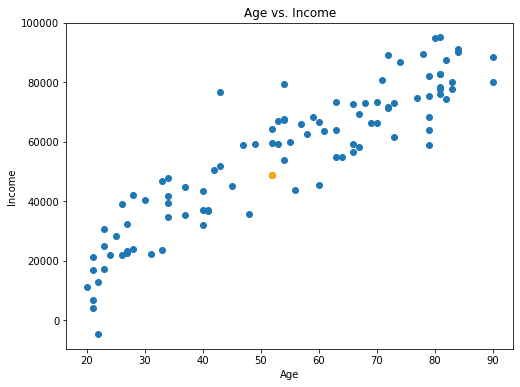

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Generate random data
n = 100  # Number of data points
age = np.random.randint(20, 91, size=n)
income = age * 1000 + np.random.normal(0, 10000, size=n)
id = np.arange(1, n+1)

# Create a DataFrame from the data
data = pd.DataFrame({'ID': id, 'Age': age, 'Income': income})

# Highlight the data point
TARGET_ID = 85
highlight_data = data[data['ID'] == TARGET_ID]

# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(age, income)
plt.scatter(highlight_data['Age'], highlight_data['Income'], color='orange')
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Age vs. Income')
plt.show()



Find the 5 closest neighbors using Euclidean distance

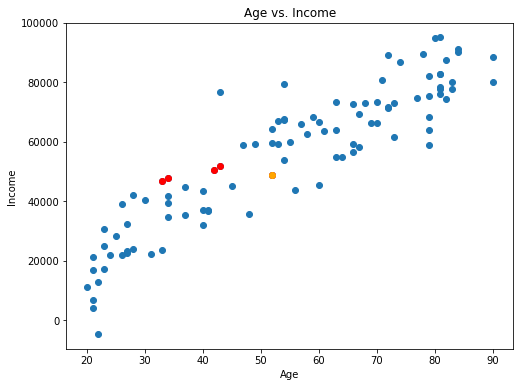

In [ ]:
from scipy.spatial.distance import cdist

# Find the 5 people closest to id
target_row = data[data['ID'] == TARGET_ID]
distances = cdist(target_row[['Age', 'Income']], data[['Age', 'Income']])
closest_indices = np.argsort(distances.squeeze())[:5]
closest_data = data.iloc[closest_indices]

# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(data['Age'], data['Income'])
plt.scatter(closest_data['Age'], closest_data['Income'], color='red')
plt.scatter(highlight_data['Age'], highlight_data['Income'], color='orange')
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Age vs. Income')
plt.show()

In [ ]:
closest_data

,ID,Age,Income
84,85,52,48755.090422
22,23,34,47718.621335
93,94,42,50474.014326
61,62,33,46923.257535
67,68,43,51735.894156


Now recheck scaling data

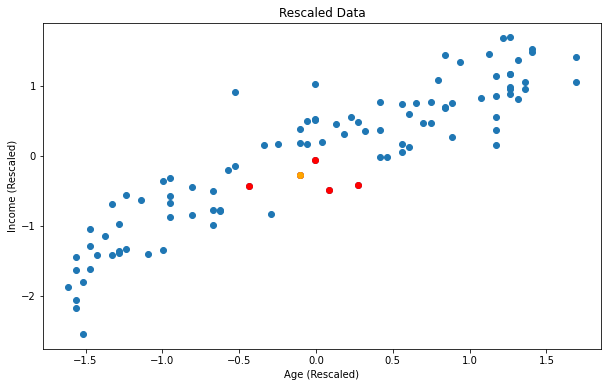

In [ ]:
# Rescale the variables using z-score standardization
scalated = data.copy()
scalated['Age_scalated'] = (scalated['Age'] - scalated['Age'].mean()) / scalated['Age'].std()
scalated['Income_scalated'] = (scalated['Income'] - scalated['Income'].mean()) / scalated['Income'].std()

# Highlight the data point
highlight_scalated = scalated[scalated['ID'] == TARGET_ID]

# Find the 5 people closest to id
target_row_scalated = scalated[scalated['ID'] == target_id]
distances_scalated = cdist(target_row_scalated[['Age_scalated', 'Income_scalated']], scalated[['Age_scalated', 'Income_scalated']])
closest_indices_scalated = np.argsort(distances_scalated.squeeze())[:5]
closest_data_scalated = scalated.iloc[closest_indices_scalated]

# Plot the rescaled data
plt.figure(figsize=(10, 6))
plt.scatter(scalated['Age_scalated'], scalated['Income_scalated'])
plt.scatter(closest_data_scalated['Age_scalated'], closest_data_scalated['Income_scalated'], color='red')
plt.scatter(highlight_scalated['Age_scalated'], highlight_scalated['Income_scalated'], color='orange')
plt.xlabel('Age (Rescaled)')
plt.ylabel('Income (Rescaled)')
plt.title('Rescaled Data')
plt.show()

In [ ]:
closest_data_scalated

,ID,Age,Income,Age_scalated,Income_scalated
84,85,52,48755.090422,-0.102828,-0.278286
47,48,54,54039.373044,-0.008490,-0.053291
95,96,56,43831.451076,0.085847,-0.487926
68,69,45,45091.443457,-0.433008,-0.434278
86,87,60,45599.585523,0.274522,-0.412642


There are 2 techniques we can apply: normalization and standardization:
![7_normalization_standarization.png](attachment:7_normalization_standarization.png)

## 5.1 Normalization (Min-Max scaling)

Normalization (or min-max normalization) scale all values in a fixed range between 0 and 1. This transformation does not change the distribution of the feature and due to the decreased standard deviations, the effects of the outliers increases. Therefore, before normalization, it is recommended to handle the outliers
$$ X{norm} = \frac{X - min(X)}{max(X) - min(X)} $$

In [ ]:
import pandas as pd

def normalize_data(data):
    min_value = min(data)
    max_value = max(data)
    normalized_data = []

    for value in data:
        normalized_value = (value - min_value) / (max_value - min_value)
        normalized_data.append(normalized_value)

    return normalized_data


# Create sample data
data = {
    'id': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'age': [25, 30, 35, 40, 45, 50, 55, 60, 65, 70],
    'income': [90000, 130000, 140000, 100000, 60000, 70000,110000, 50000,  80000,  120000]
}

# Create dataframe
df = pd.DataFrame(data)

# Normalize 'age' column
df['age_normalized'] = normalize_data(df['age'])

# Normalize 'income' column
df['income_normalized'] = normalize_data(df['income'])

# Display the dataframe
display(df)

,id,age,income,age_normalized,income_normalized
0,1,25,90000,0.000000,0.444444
1,2,30,130000,0.111111,0.888889
2,3,35,140000,0.222222,1.000000
3,4,40,100000,0.333333,0.555556
4,5,45,60000,0.444444,0.111111
5,6,50,70000,0.555556,0.222222
6,7,55,110000,0.666667,0.666667
7,8,60,50000,0.777778,0.000000
8,9,65,80000,0.888889,0.333333
9,10,70,120000,1.000000,0.777778


## 5.2 Standardization

It is useful when the data follows a normal distribution. Geometrically, it transforms (shifts) the data to the mean of the original data to the
origin (μ=o) and squishes or expands the points to unit standard deviation (σ=1), respectively, without affecting the shape of the distribution.
$$ Z = \frac{x - \mu}{\sigma} $$

In [ ]:
import pandas as pd
import numpy as np

# Create sample data
data = {
    'id': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'age': [25, 30, 35, 40, 45, 50, 55, 60, 65, 70],
    'income': [90000, 130000, 140000, 100000, 60000, 70000,110000, 50000,  80000,  120000]
}

# Create dataframe
df = pd.DataFrame(data)

# Standardize 'age' column
df['age_standardized'] = (df['age'] - np.mean(df['age'])) / np.std(df['age'])

# Standardize 'income' column
df['income_standardized'] = (df['income'] - np.mean(df['income'])) / np.std(df['income'])

# Display the dataframe
display(df)

,id,age,income,age_standardized,income_standardized
0,1,25,90000,-1.566699,-0.174078
1,2,30,130000,-1.218544,1.218544
2,3,35,140000,-0.870388,1.566699
3,4,40,100000,-0.522233,0.174078
4,5,45,60000,-0.174078,-1.218544
5,6,50,70000,0.174078,-0.870388
6,7,55,110000,0.522233,0.522233
7,8,60,50000,0.870388,-1.566699
8,9,65,80000,1.218544,-0.522233
9,10,70,120000,1.566699,0.870388


## Exercise

Using the same data frame as in the chart example:
* Normalize data
* Check if you get the same 4 closests neighbors as in the example (id = 71)
* Denormalize data: get the normalized variables back to the original value

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Generate random data
n = 100  # Number of data points
age = np.random.randint(20, 91, size=n)
income = age * 1000 + np.random.normal(0, 10000, size=n)
id = np.arange(1, n+1)

# Create a DataFrame from the data
data = pd.DataFrame({'ID': id, 'Age': age, 'Income': income})

**Solution:**

,ID,Age,Income,Age_normalized,Income_normalized,Age_denormalized,Income_denormalized
0,1,71,80729.635338,0.728571,0.856206,71.0,80729.635338
1,2,34,41955.954639,0.200000,0.466927,34.0,41955.954639
2,3,80,94954.342529,0.857143,0.999019,80.0,94954.342529
3,4,40,43381.812520,0.285714,0.481242,40.0,43381.812520
4,5,43,76722.962536,0.328571,0.815980,43.0,76722.962536
...,...,...,...,...,...,...,...
95,96,56,43831.451076,0.514286,0.485757,56.0,43831.451076
96,97,63,73493.473923,0.614286,0.783557,63.0,73493.473923
97,98,54,67251.056615,0.485714,0.720884,54.0,67251.056615
98,99,84,91345.010649,0.914286,0.962782,84.0,91345.010649


4 neighbors using scalation:


,ID,Age,Income,Age_scalated,Income_scalated
84,85,52,48755.090422,-0.102828,-0.278286
47,48,54,54039.373044,-0.008490,-0.053291
95,96,56,43831.451076,0.085847,-0.487926
68,69,45,45091.443457,-0.433008,-0.434278
86,87,60,45599.585523,0.274522,-0.412642


4 neighbors using normalization:


,ID,Age,Income,Age_normalized,Income_normalized,Age_denormalized,Income_denormalized
84,85,52,48755.090422,0.457143,0.535189,52.0,48755.090422
47,48,54,54039.373044,0.485714,0.588242,54.0,54039.373044
95,96,56,43831.451076,0.514286,0.485757,56.0,43831.451076
90,91,53,59176.408455,0.471429,0.639817,53.0,59176.408455
68,69,45,45091.443457,0.357143,0.498407,45.0,45091.443457


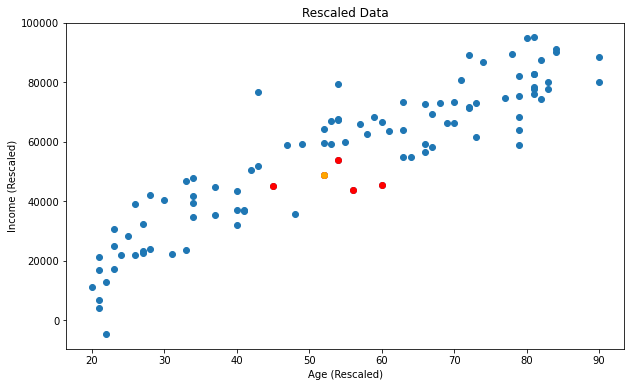

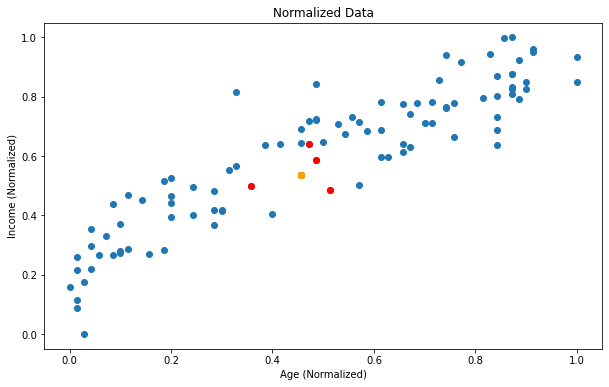

## Exercise:
Given the following dataset, apply the different techniques we have seen in class:
- Deleitons
- Imputations
- Feature Engineering
- Encode categorical variables
- Visualization of the 2 variables you consider inffluence more the probability of surviving
- Which insights can you get from the data?

The dataset contains the details of a subset of the passengers that were on board of the Titanic, and importantly, will reveal whether they survived or not. Data:
- survival:	Survival	0 = No, 1 = Yes
- pclass: Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
- sex: Sex
- Age: Age in years
- sibsp: # of siblings / spouses aboard the Titanic
- parch: # of parents / children aboard the Titanic
- ticket: Ticket number
- fare: Passenger fare
- cabin: Cabin number
- embarked: Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

In [ ]:
from sklearn.datasets import fetch_openml
import pandas as pd

# Load the Titanic dataset from scikit-learn
titanic = fetch_openml('titanic', version=1)

# Convert the dataset to a Pandas DataFrame
titanic_df = pd.DataFrame(data=titanic.data, columns=titanic.feature_names)
titanic_df['survival'] = titanic.target  # Add the target column

# Remove columns
columns_to_remove = ['boat', 'body', 'home.dest', 'name']
titanic_df.drop(columns=columns_to_remove, inplace=True)

# Display the first few rows of the DataFrame
titanic_df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


,pclass,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survival
0,1.0,female,29.0000,0.0,0.0,24160,211.3375,B5,S,1
1,1.0,male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,1
2,1.0,female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,0
3,1.0,male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,0
4,1.0,female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,0
